<font size="+3">Topography (raster)</font>

Handles Elevation raster maps (DEM). 

Currently manages the SRTM files of NASA (30m resolution). 



In [1]:
from hera import toolkitHome
projectName = "DOCUMENTATION"

tk = toolkitHome.getToolkit(toolkitName=toolkitHome.GIS_RASTER_TOPOGRAPHY,projectName=projectName)

In [2]:
tk.getDataSourceList()

['SRTMGL1']

In [3]:
tk.getDataSourceDocument("SRTMGL1")

<Measurements: {
    "_cls": "Metadata.Measurements",
    "projectName": "DOCUMENTATION",
    "desc": {
        "desc": {},
        "toolkit": "TopographyToolkit",
        "datasourceName": "SRTMGL1",
        "version": [
            0,
            0,
            1
        ]
    },
    "type": "ToolkitDataSource",
    "resource": "/home/salo/development/hera/hera/doc/jupyter/data/raster/N31E034.SRTMGL1.hgt",
    "dataFormat": "string"
}>

In [4]:
tk.getConfig()['defaultSRTM']

'SRTMGL1'

# Get the elevation map 

To get the elevation map in code use 

In [5]:
xmin = 34.529
xmax = 34.531
ymin = 31.160
ymax = 31.162

elevation = tk.getElevation(xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,='SRTMGL1')

/home/salo/development/hera/hera/measurements/GIS/raster/topography.py:182: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '173.45000132584605' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pointList.loc[itemindx,'elevation'] = elevation


In [6]:
elevation

<xarray.Dataset> Size: 1kB
Dimensions:    (i: 7, j: 8)
Coordinates:
  * i          (i) int64 56B 0 1 2 3 4 5 6
  * j          (j) int64 64B 0 1 2 3 4 5 6 7
Data variables:
    X          (i, j) float64 448B 1.551e+05 1.551e+05 ... 1.552e+05 1.552e+05
    Y          (i, j) float64 448B 5.634e+05 5.634e+05 ... 5.636e+05 5.636e+05
    Elevation  (i, j) float64 448B 173.5 174.8 176.3 176.9 ... 180.5 182.3 182.7

You can plot the sepcified region satile map using the Tile ToolKit:

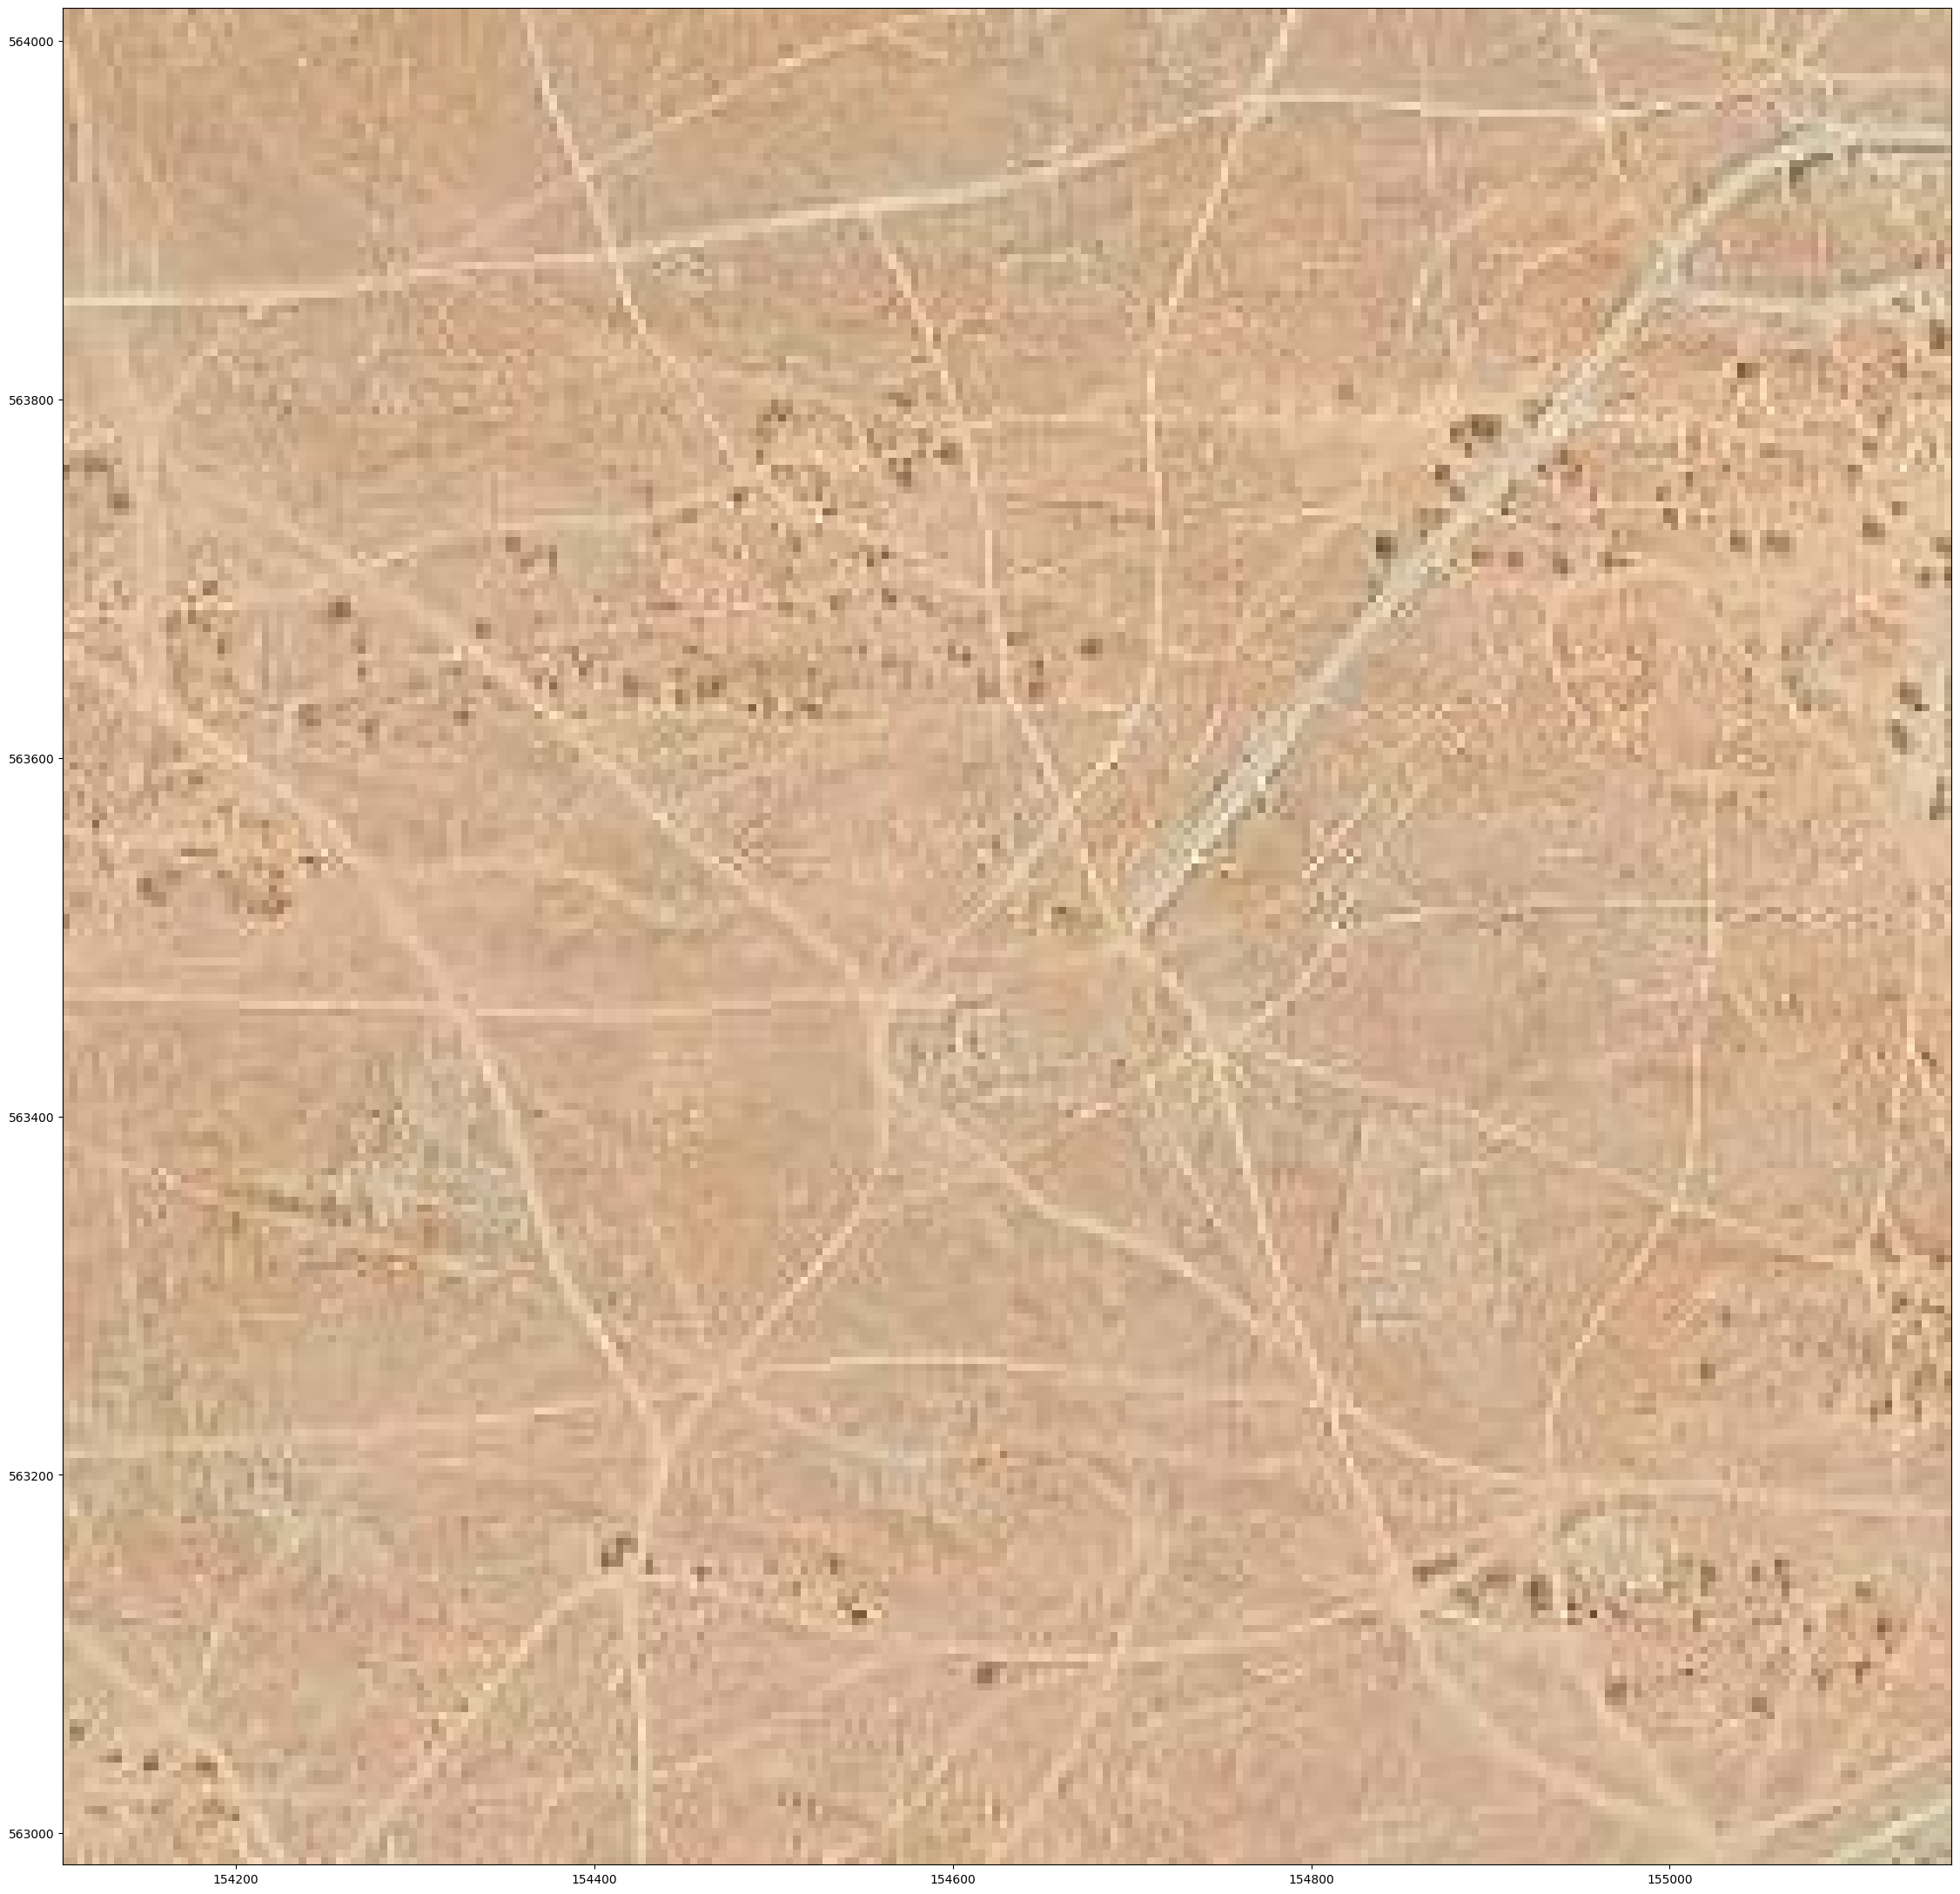

In [11]:
import matplotlib.pyplot as plt 

tile = toolkitHome.getToolkit(toolkitHome.GIS_TILES,projectName=projectName)
TA = dict(minx=xmin,maxx=xmax,maxy=ymax,miny=ymin,zoomlevel=15,tileServer=tile.getDataSourceList()[0])
img = tile.getImageFromCorners(**TA)
fig,ax = plt.subplots(1,1,figsize=(28,28))
tile.presentation.plot(img,ax=ax)

### Create STL in Python  

You can create a STL of the specified region in your python script using getDomainElevation_STL() function:


In [9]:
stlstr = tk.getDomainElevation_STL(minx=xmin,maxx=xmax,maxy=ymax,miny=ymin)
with open("output.stl", "w") as stl_file:
    stl_file.write(stlstr)

/home/salo/development/hera/hera/measurements/GIS/raster/topography.py:182: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '173.45000132584605' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pointList.loc[itemindx,'elevation'] = elevation


### Create STL in CLI  
You can also create a STL file using the CLI:  

<p style="background:black">
<code style="background:black;color:white">>> hera-GIS topography_raster toSTL --minx --miny --maxx --maxy --dxdy --inputCRS --outputCRS --dataSourceName --fileName --projectName
</code>
</p>   
  
Arguments:  
- **minx**: Lower x boundingbox (float).
- **miny**: Lower y boundingbox (float).
- **maxx**: Upper x boundingbox (float).
- **maxy**: Upper y boundingbox (float).
- **dxdy**: The resolution of the mesh, Default is 30m (float).
- **inputCRS**: The CRS of the input coordinates. To use WSG84, pass 4326, for ITM pass 2039. The default is WSG84 (int).
- **outputCRS**: The CRS of the output coordinates. To use WSG84, pass 4326, for ITM pass 2039. The default is ITM (int).
- **dataSourceName**: The name of the datasource. If not supplied, uses the default datasource of the toolkit (str). 
- **fileName**: Path to save STL file (str).
- **projectName**: The Project Name. If not provided, uses default project (str).

Before applying the function, please make sure the datasource (or a default datasource) is loaded to the project you supply.  
For this:

1) Add the repository to the repository list:
   
   ```hera-project repository add [PATH_TO_REPOSITORY_WITH_DATASOURCE]```
   
3) Load the repository to Project:
   If the project is new, create a new project:
   
   ```hera-project project create [PROJECT_NAME]```  
   
   If it is an existing project, load it to the project:
   
   ```hera-project project loadRepositories [PATH_TO_REPOSITORY_WITH_DATASOURCE]```


For more details on repositories and project, read :  [Projects](../../../../datalayer/Project.ipynb) , [Repositories](../../../../Repository.ipynb)